**Nutritional Facts Checking and Impact on Persons Life**

Dataset Link:- https://drive.google.com/file/d/1EqzNFoafTux-5VzHWmzLkjv4W7bX7iLG/view?usp=drive_link

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset into a Pandas DataFrame

In [ ]:
file_path = 'Nutritional-Facts-Dataset.csv'
df = pd.read_csv(file_path)

In [8]:
df.head() # Display the first few rows of the DataFrame.

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976,660,32,40,36,0.0,48.0,Dairy products
1,Milk skim,984,360,36,1,1,0.0,52.0,Dairy products
2,Buttermilk,246,127,9,5,4,0.0,13.0,Dairy products
3,"Evaporated, undiluted",252,345,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,1419,1373,89,42,23,1.4,119.0,Dairy products


In [5]:
df.info() # Display a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      1340 non-null   object 
 1   Grams     1340 non-null   int64  
 2   Calories  1340 non-null   int64  
 3   Protein   1340 non-null   int64  
 4   Fat       1340 non-null   int64  
 5   Sat.Fat   1340 non-null   int64  
 6   Fiber     1340 non-null   float64
 7   Carbs     1340 non-null   float64
 8   Category  1340 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 94.3+ KB


In [11]:
# Print the shape of the DataFrame (number of rows and columns)
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (1340, 9)


In [12]:
# Display the column names and their data types
print("\nColumn Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Food         object
Grams         int64
Calories      int64
Protein       int64
Fat           int64
Sat.Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object


In [13]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and how many are missing
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [15]:
# Generate summary statistics for numerical columns
df.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,143.211940,188.292537,8.695522,8.886567,6.453731,2.449582,25.021194
std,138.513197,184.213836,17.657343,19.631230,18.430827,16.027109,35.766347
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,108.000000,130.000000,3.000000,1.000000,0.000000,0.500000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


In [17]:
# Selects all columns in the DataFrame that have data types int64 or float64 and
# stores the names of all numerical columns in the DataFrame.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Selects all columns in the DataFrame that have the data type object and
# stores the names of all categorical columns in the DataFrame.
categorical_columns = df.select_dtypes(include=['object']).columns

**Historgrams**

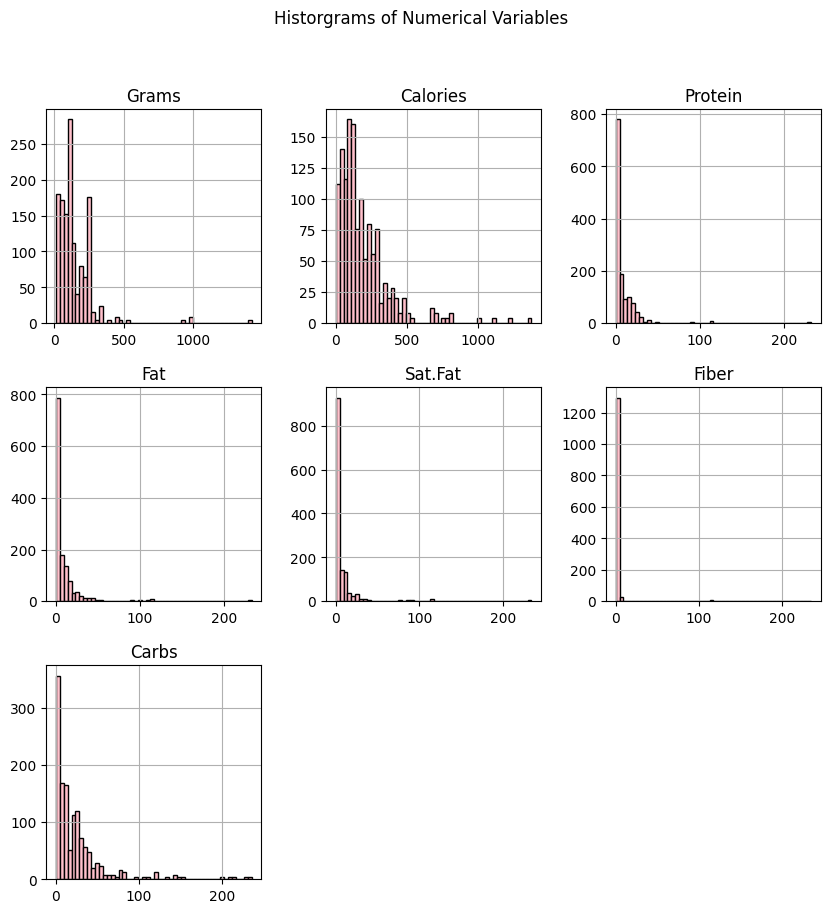

In [29]:
df[numerical_columns].hist(bins=50, figsize = (10, 10), color = 'pink', edgecolor='black')
# hist(): Pandas method that generates histograms
# bins: the data is divided into 50 intervals.
# figsize: this controls the size of the entire plot grid.
plt.suptitle('Historgrams of Numerical Variables')
plt.show()

**Insights**

The histograms show the frequency distribution of each numerical variable, revealing whether they are normally distributed, skewed.

If a histogram is longer tail on the left, it suggests that most data points are higher, but some lower values stretch the tail. A right-skewed histogram indicates the opposite.

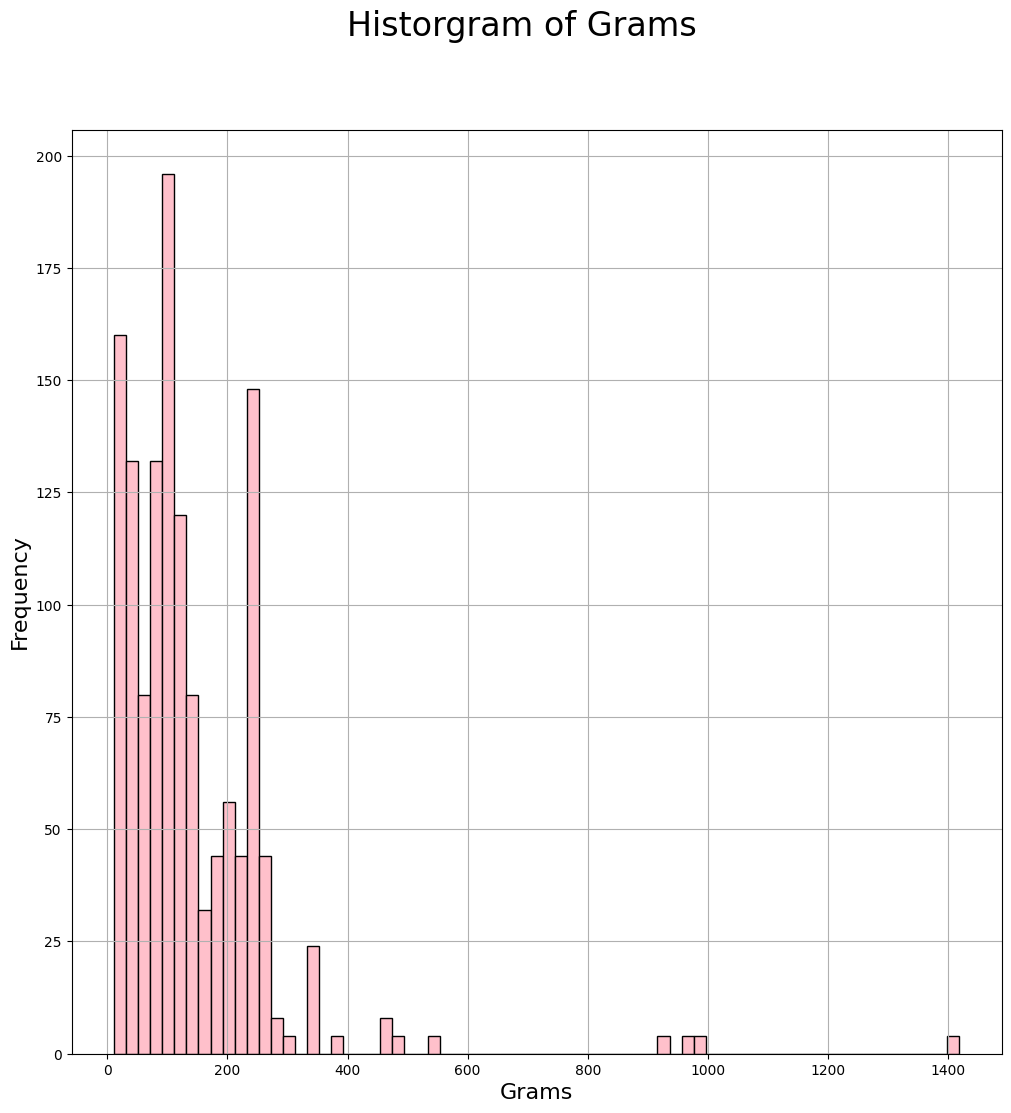

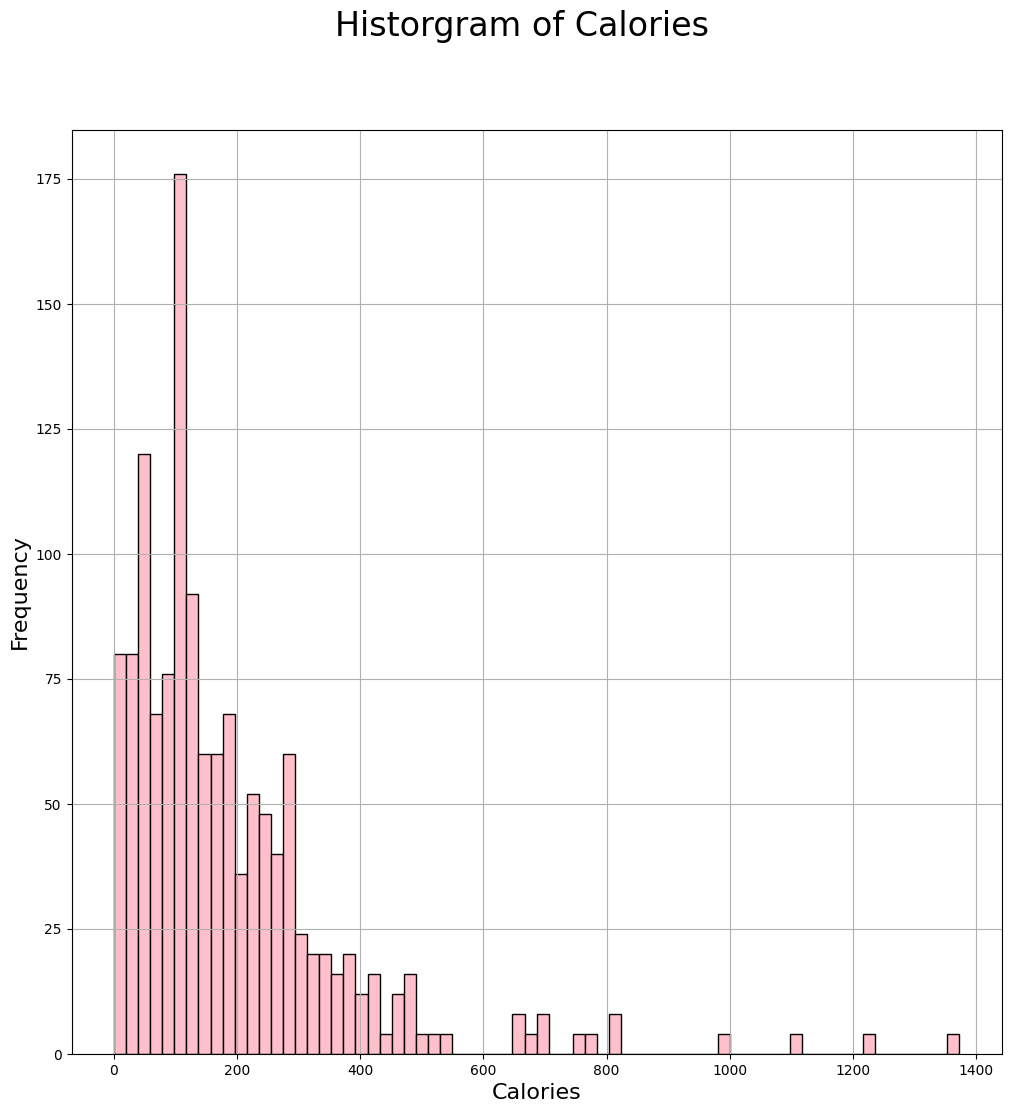

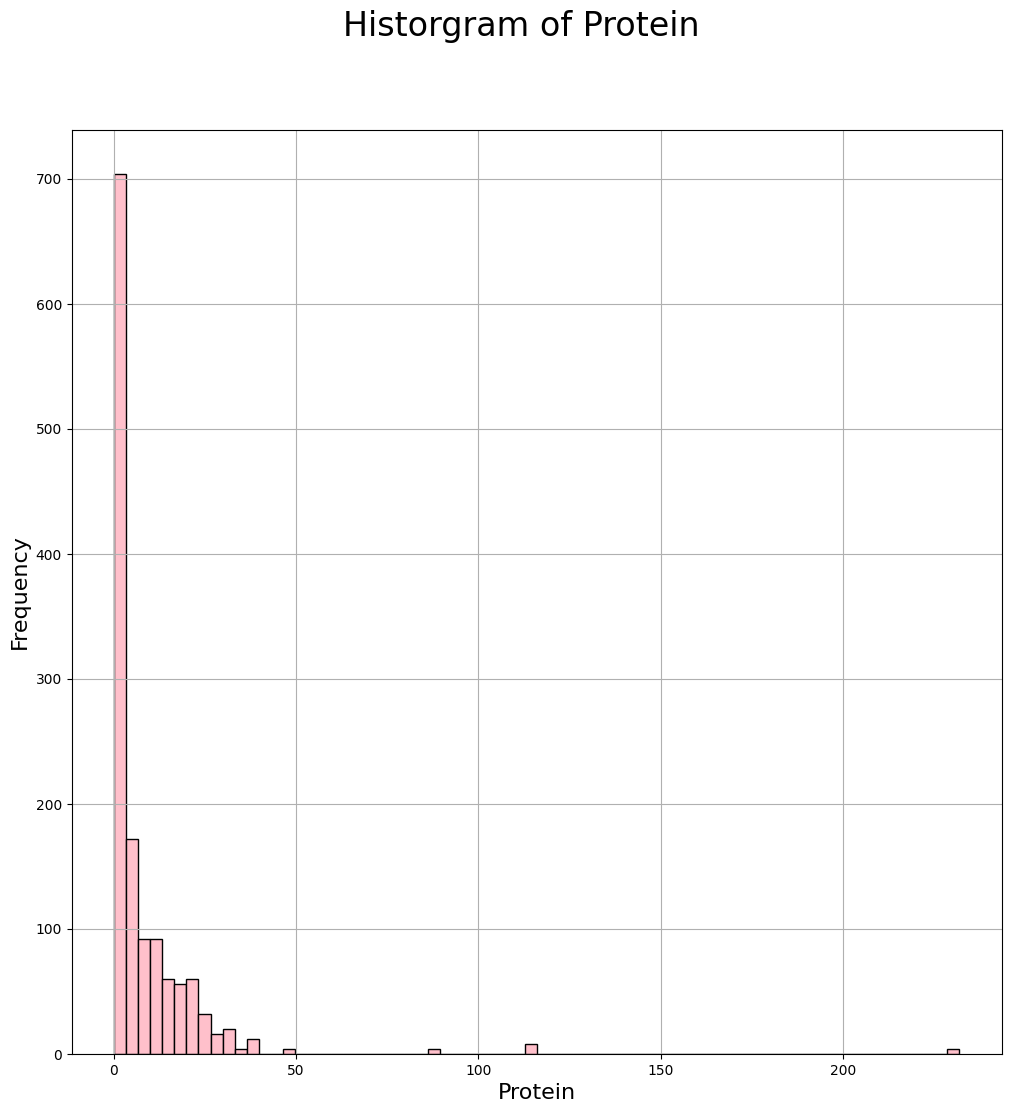

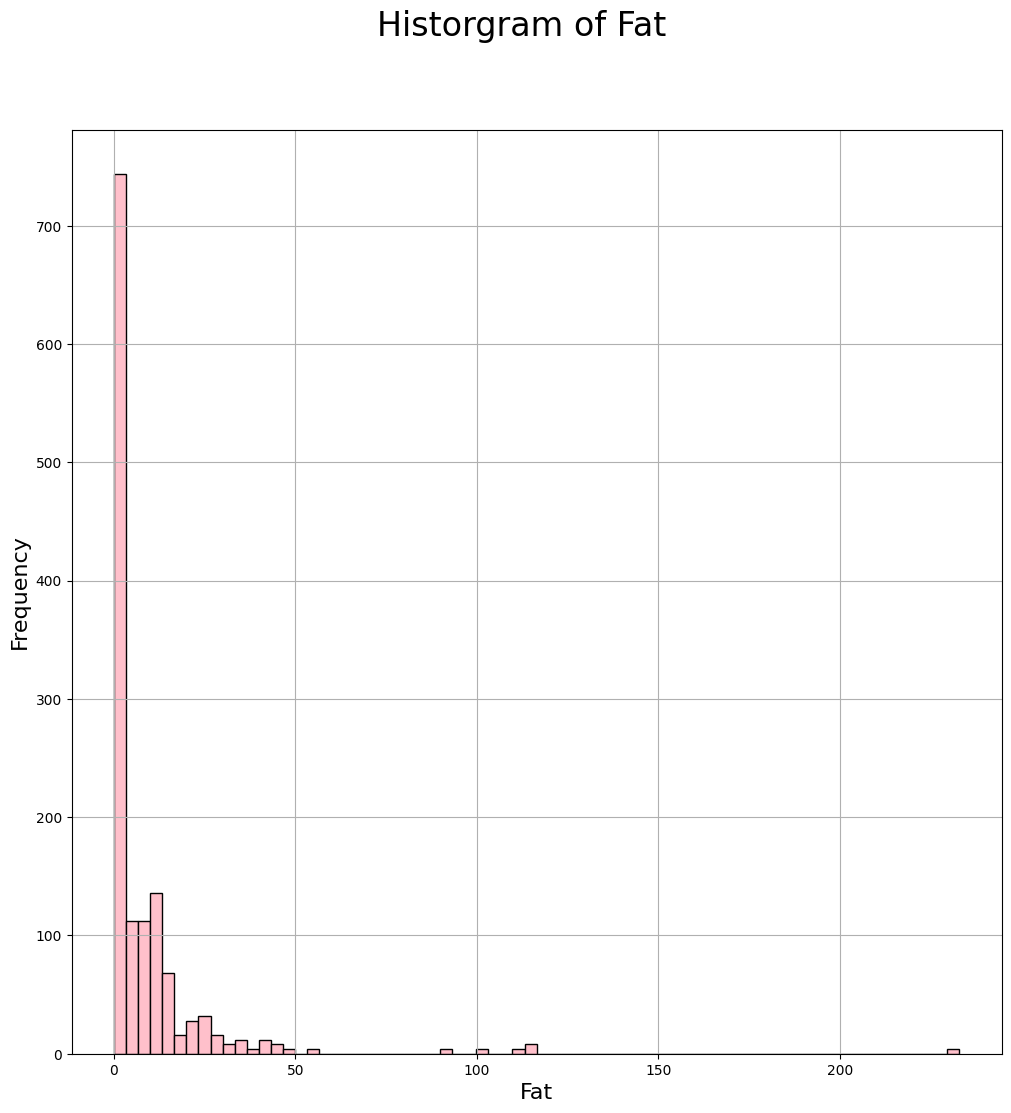

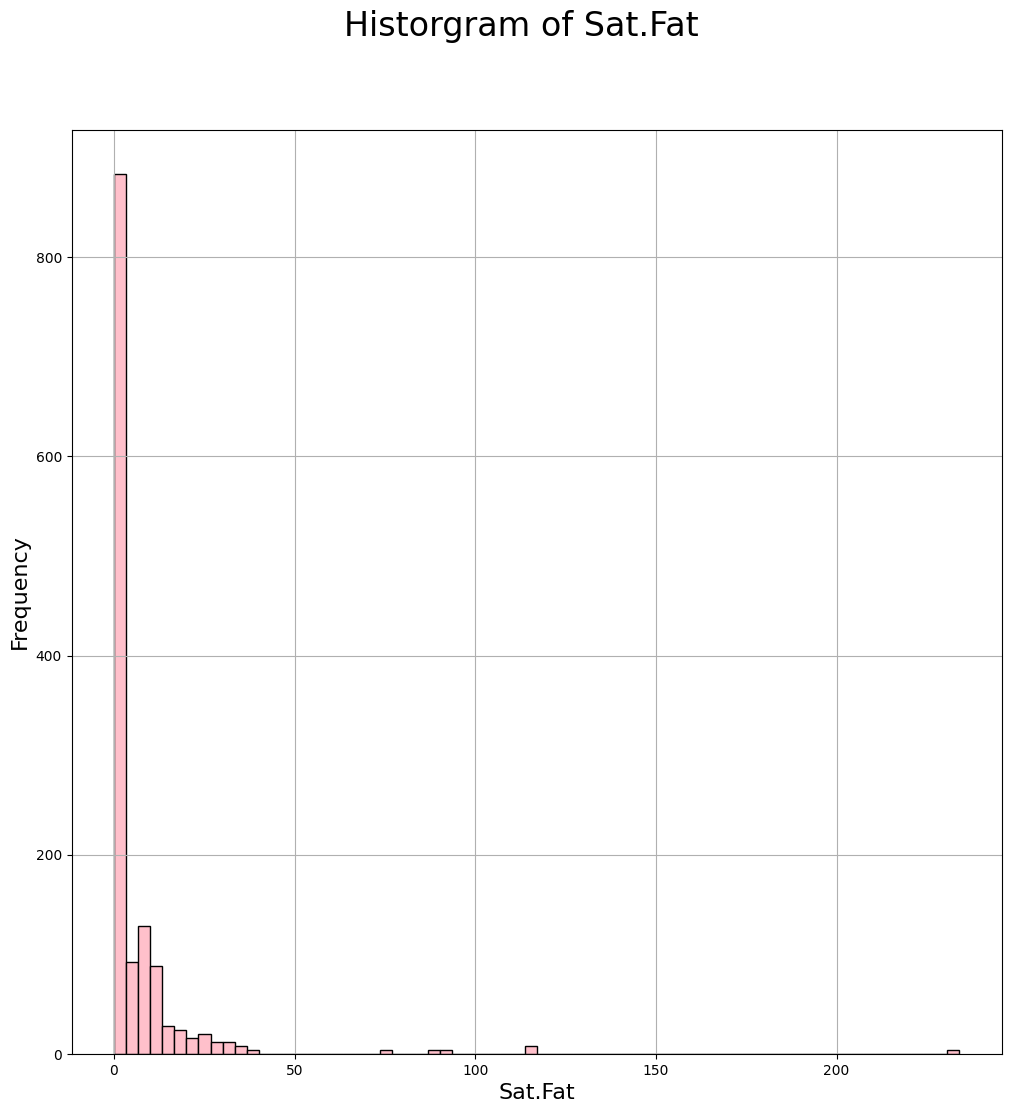

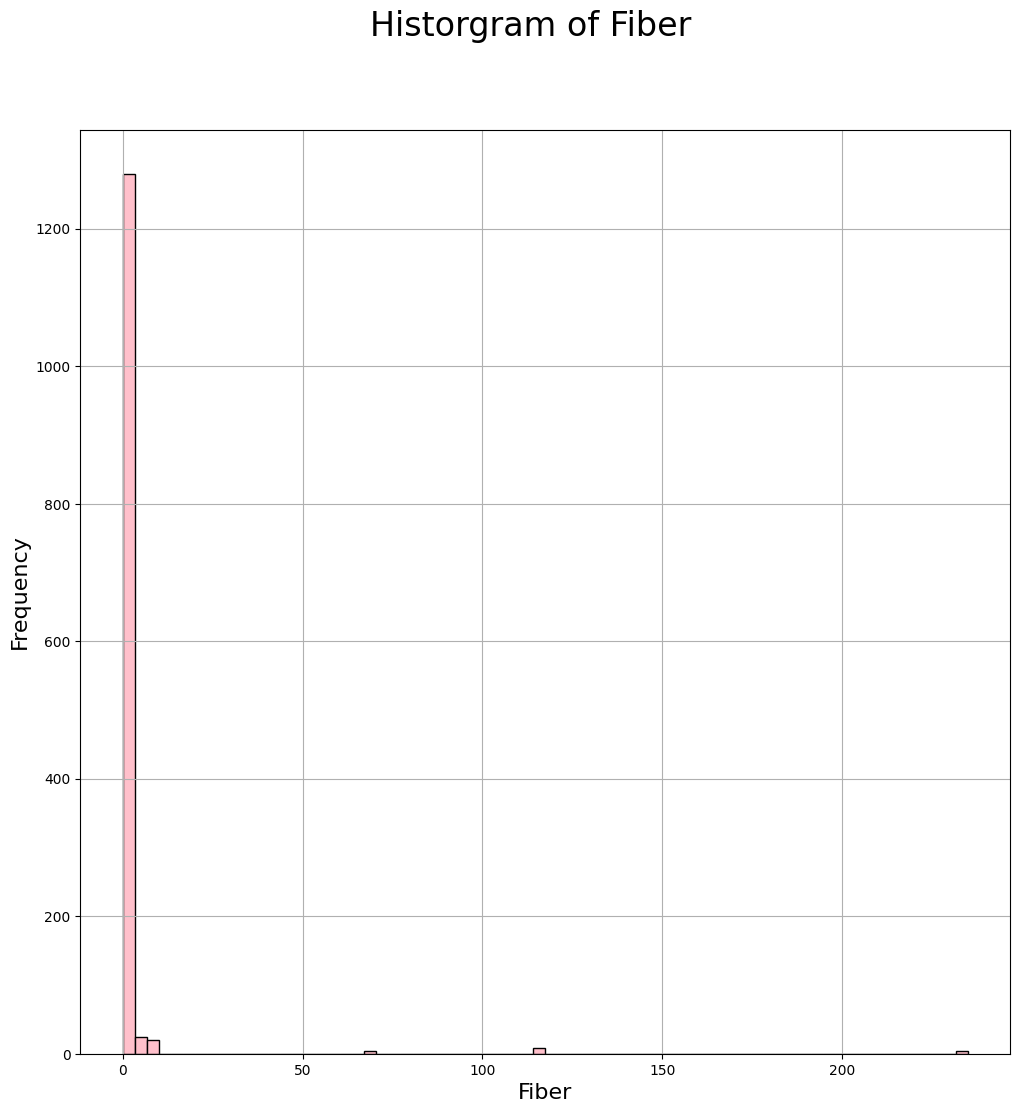

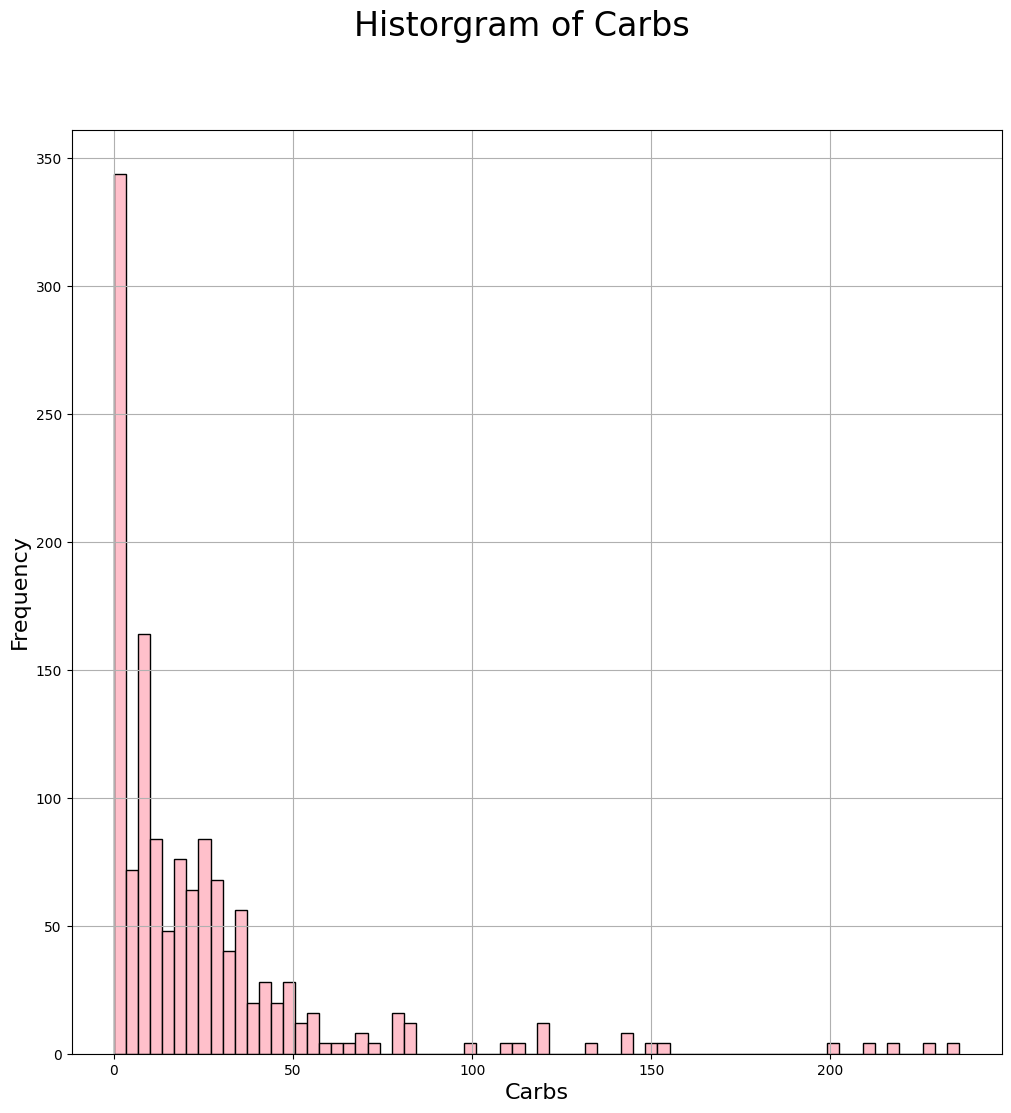

In [38]:
for col in numerical_columns:
    df[col].hist(bins=70, figsize = (12, 12), color = 'pink', edgecolor='black')
    plt.suptitle(f'Historgram of {col}', fontsize=24)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.grid(True)
    plt.show()

**Box Plot**

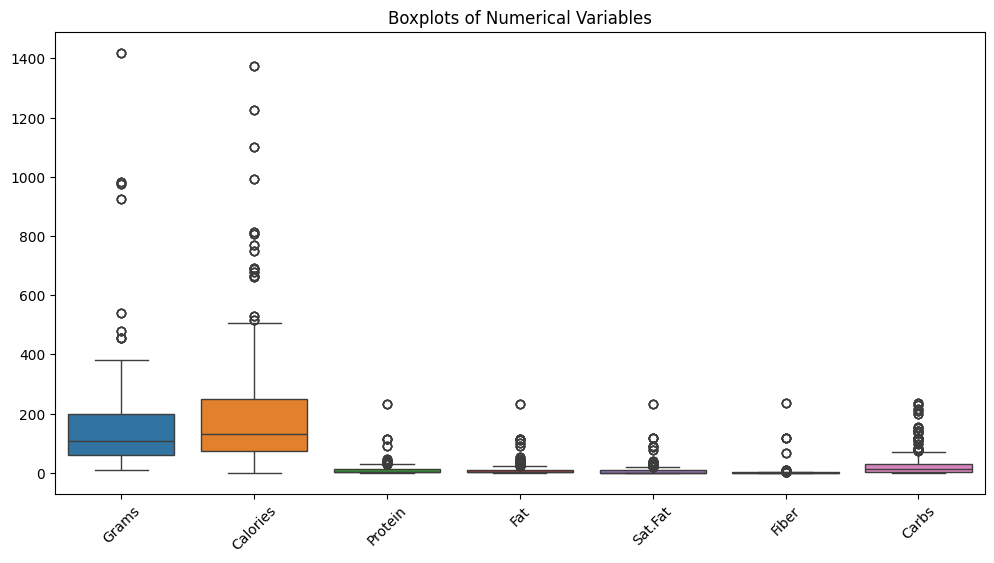

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

**Insights**

If the box is narrow with short whiskers, the data is tightly clustered around the median, indicating low variability. A wider box or longer whiskers suggests high variability.

Outliers are shown as points outside the whiskers. Their presence may indicate extreme values or errors that need addressing.

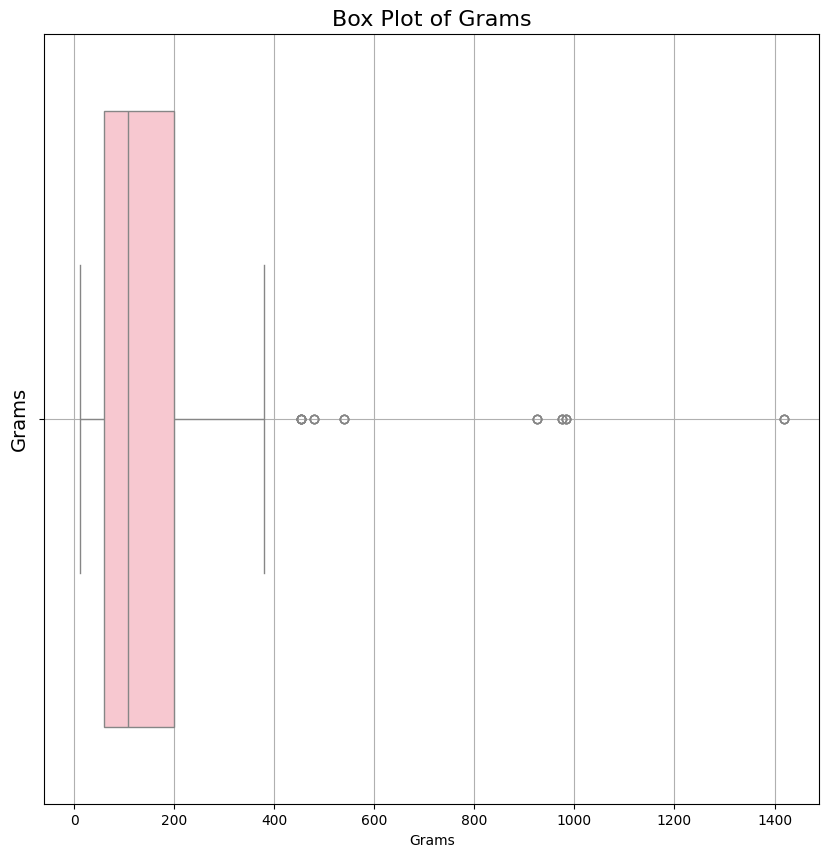

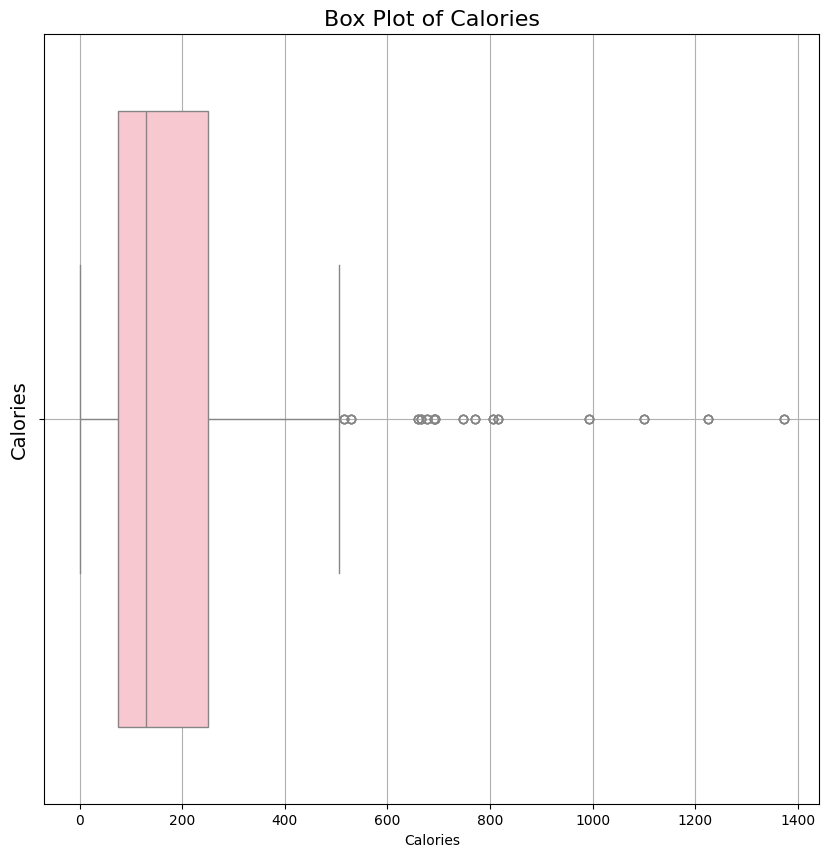

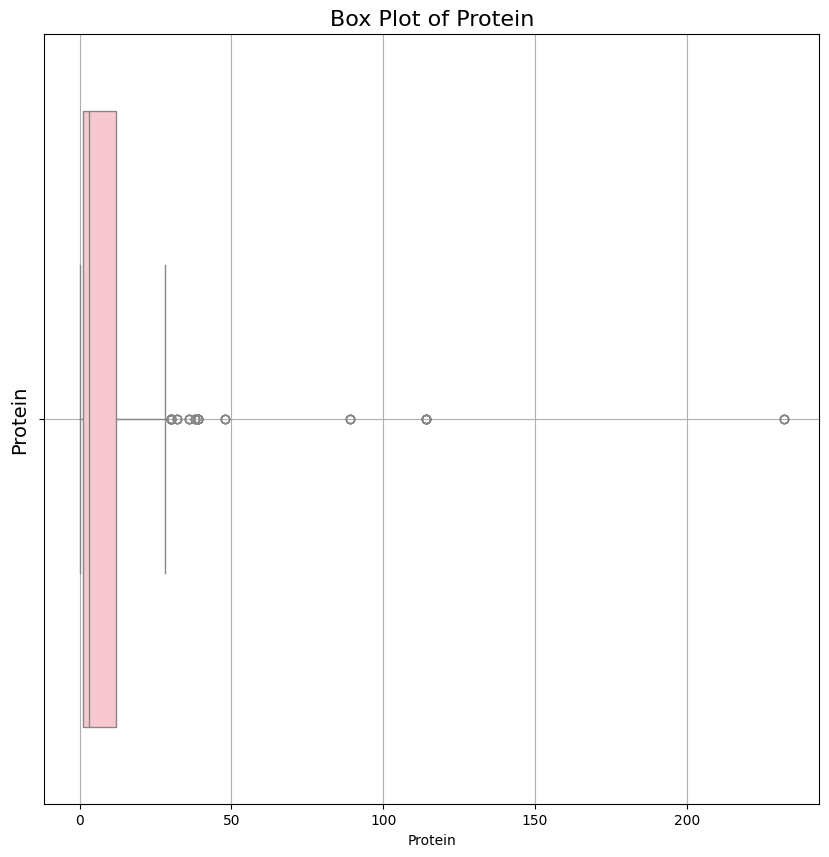

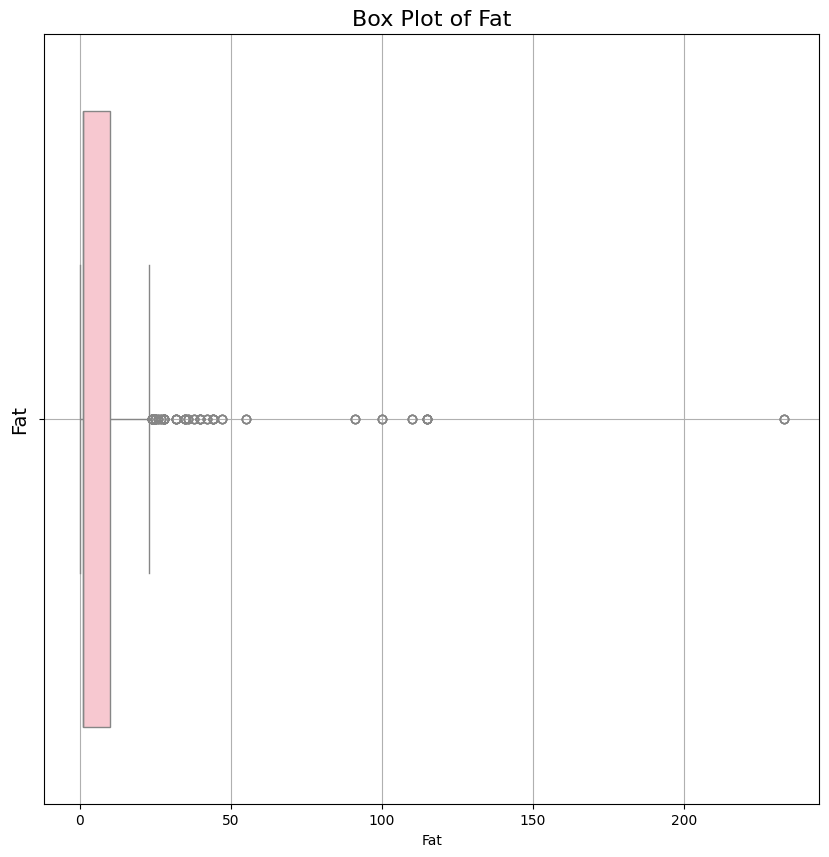

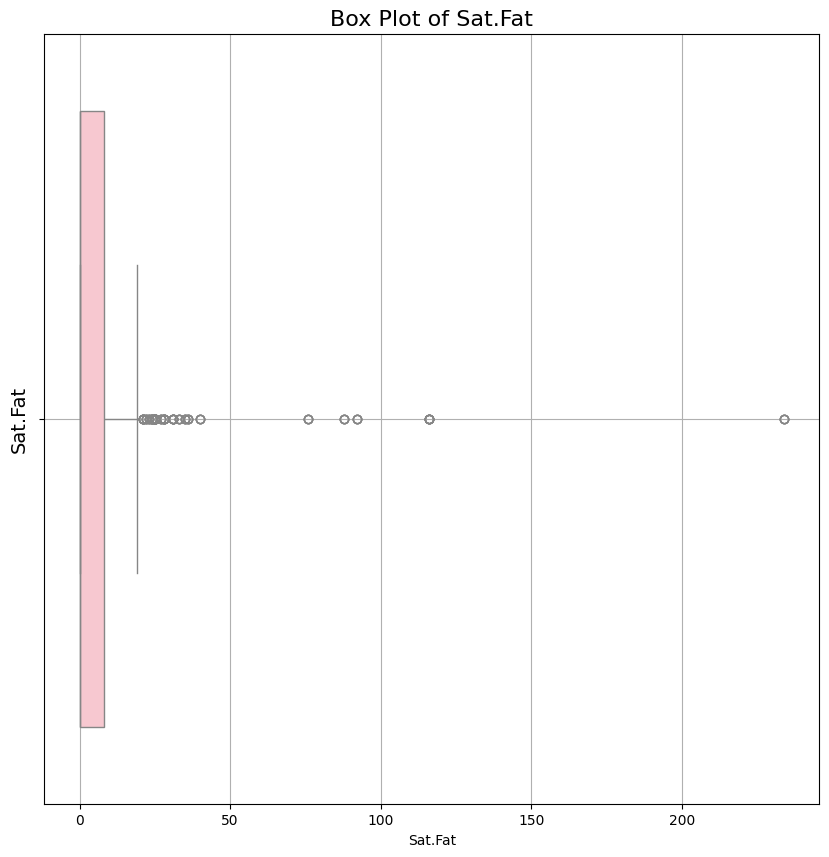

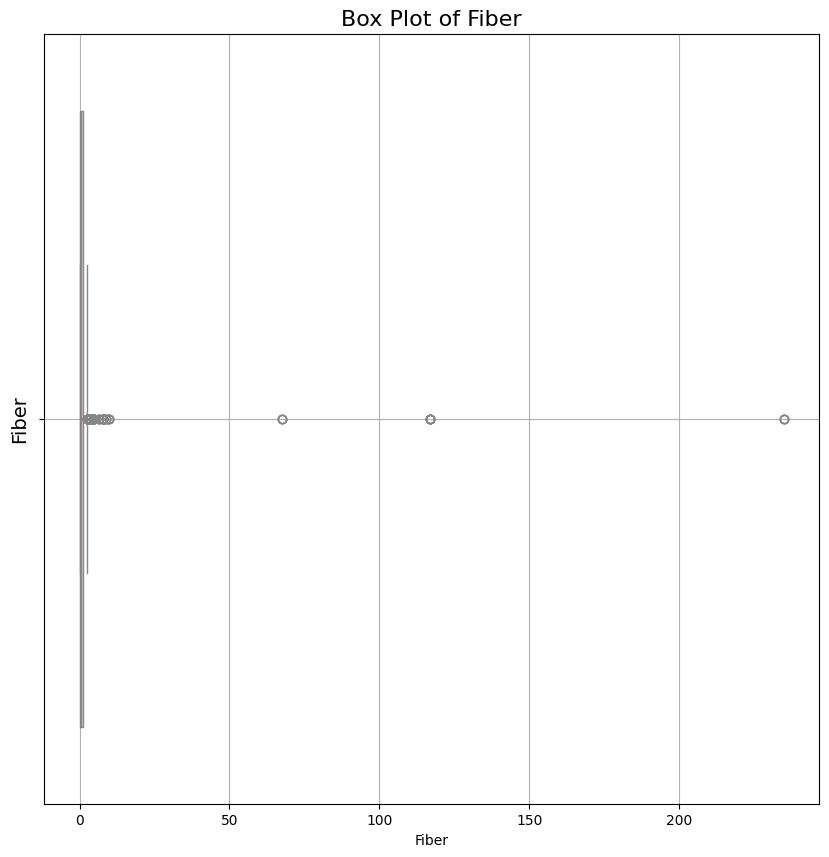

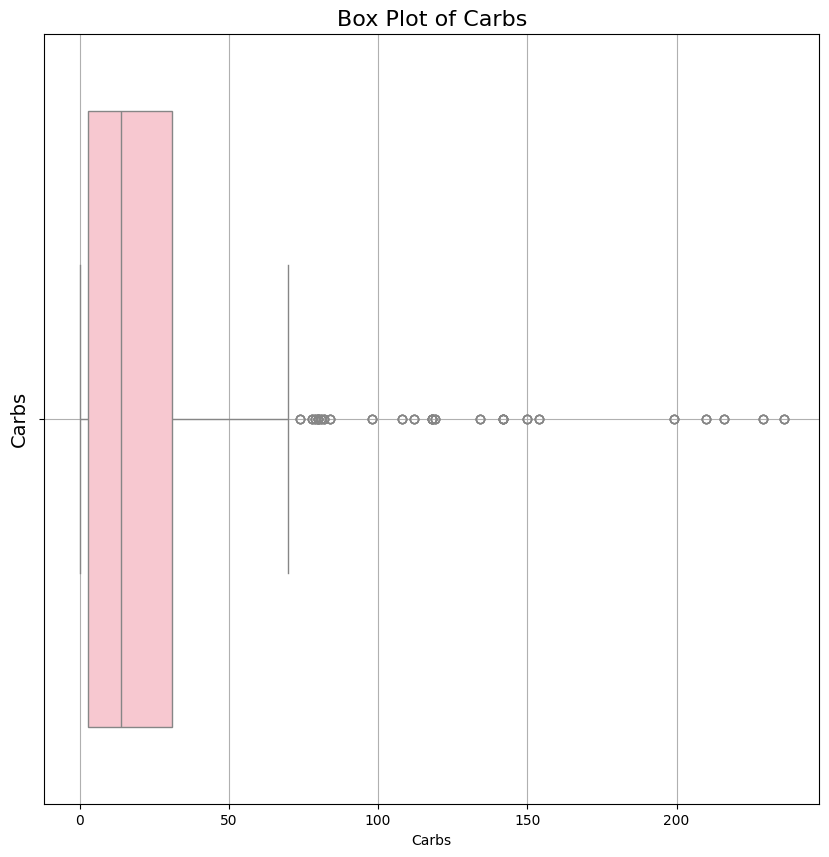

In [27]:
for col in numerical_columns:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[col], color = 'pink')
    plt.title(f'Box Plot of {col}', fontsize = 16)
    plt.ylabel(col, fontsize = 14)
    plt.grid(True)
    plt.show()

**Column Chart**

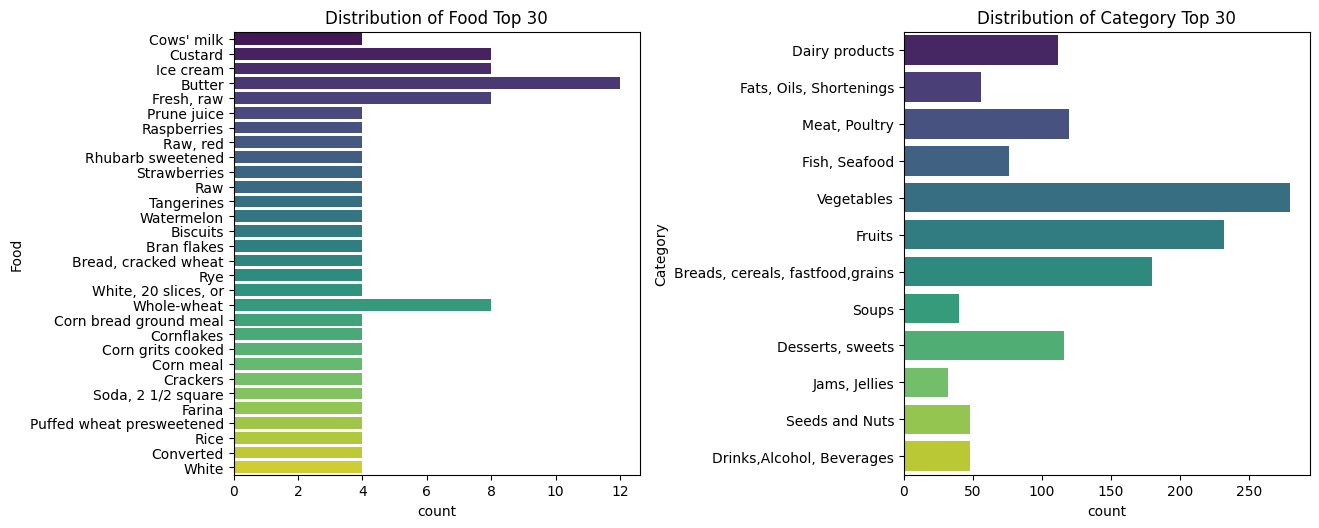

In [39]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_categories = df[col].value_counts().nlargest(30).index
    sns.countplot(y=col, data=df[df[col].isin(top_categories)], hue=col, palette="viridis", legend=False)
    plt.title(f'Distribution of {col} Top 30')
plt.tight_layout()
plt.show()

**Insights**

A high bar for a particular category suggests it's the most common or frequent in the dataset, while shorter bars indicate less common categories.

If the plot shows a few categories with significantly higher counts than others, it may indicate imbalances in the dataset that could impact analyses or models that rely on even distributions.

**Heat Map**

In [42]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

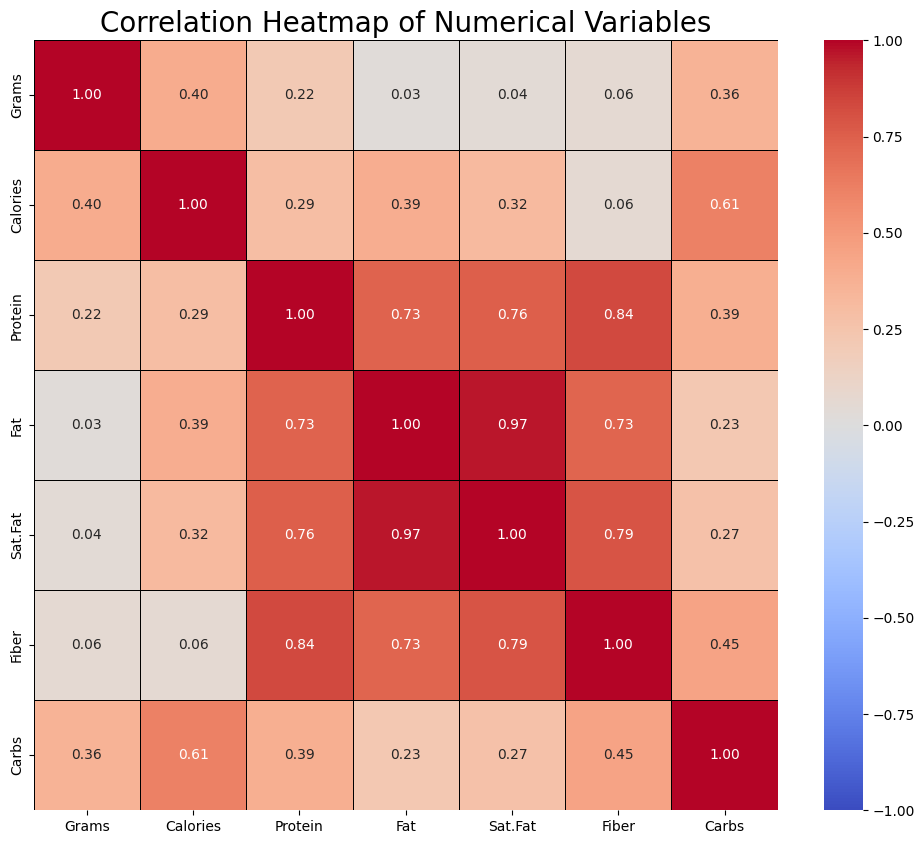

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Variables', fontsize=20)
plt.show()

**Insights**

The heatmap shows that certain nutritional elements (like fat, protein, and calories) are interconnected, reflecting the natural composition of food items where high-fat content may often coincide with higher protein and calorie counts.

Foods high in saturated fat are strongly associated with high total fat content.
Calories are more moderately correlated with both carbs and fat, suggesting that different types of foods (e.g., high-carb vs. high-fat) contribute differently to calorie intake.

In [ ]:
# Fill missing values with a specific value (e.g., 0)
df_filled = df.fillna(0)

In [52]:
# Drop rows with any missing values
df_dropped_rows = df.dropna()